In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Year 4/NLP notebooks and data/Data/Preprocessed/with_topics_numeric.csv')

In [4]:
df.shape

(11808, 32)

In [5]:
df['ground_truth'].unique()

array(['positive', 'negative'], dtype=object)

In [6]:
df.shape

(11808, 32)

In [7]:
df['ground_truth'].value_counts()

,count
ground_truth,
positive,11227
negative,581


# Sentiment and Topic Modeling

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create the contingency table
contingency_table = pd.crosstab(df['ground_truth'], df['assigned_topics'])

# Print the contingency table
contingency_table

assigned_topics,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
ground_truth,,,,,,,,,,,,,,,,
negative,215,0,7,0,67,4,3,4,1,198,75,1,4,0,1,1
positive,261,1185,883,440,723,1649,952,527,106,824,212,240,949,781,1203,292


In [ ]:
# Step 2: Perform Chi-square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
print("\nChi-Square Test Results:")
print(f"Chi2 Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi-Square Test Results:
Chi2 Value: 2828.0489782437717
P-Value: 0.0
Degrees of Freedom: 15
Expected Frequencies:
[[  23.42107046   58.3066565    43.79149729   21.649729     38.87110434
    81.33409553   46.98975271   26.12728659    5.26482046   50.28641599
    14.12152778   11.85814702   46.89134485   38.42826897   59.24153117
    14.41675136]
 [ 452.57892954 1126.6933435   846.20850271  418.350271    751.12889566
  1571.66590447  908.01024729  504.87271341  101.73517954  971.71358401
   272.87847222  229.14185298  906.10865515  742.57173103 1144.75846883
   278.58324864]]


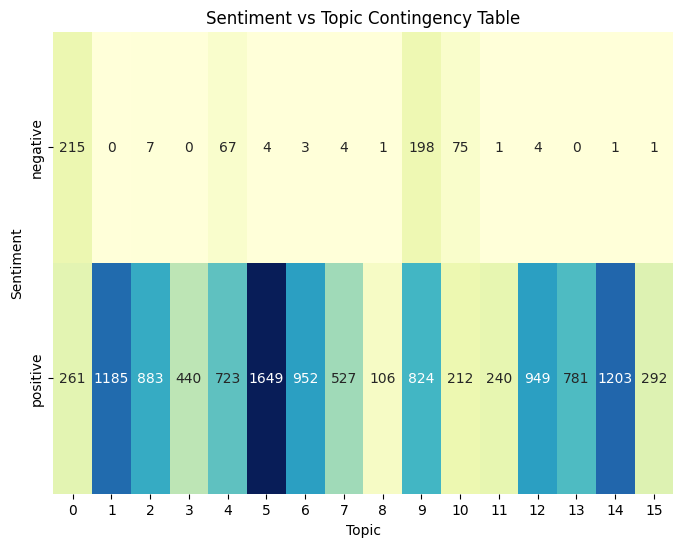

In [ ]:
# Visualizing the Contingency Table using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.title('Sentiment vs Topic Contingency Table')
plt.ylabel('Sentiment')
plt.xlabel('Topic')
plt.show()

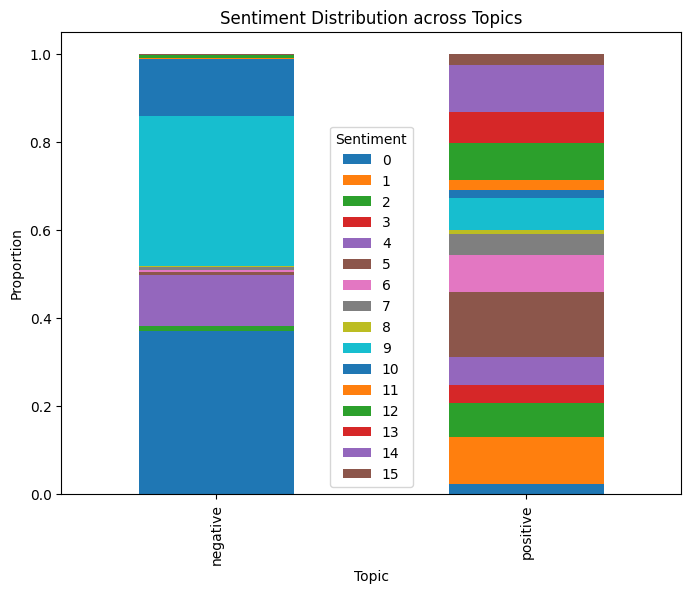

In [ ]:
# Displaying Sentiment Distribution across Topics
sentiment_dist = contingency_table.div(contingency_table.sum(axis=1), axis=0)
sentiment_dist.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Sentiment Distribution across Topics')
plt.ylabel('Proportion')
plt.xlabel('Topic')
plt.legend(title="Sentiment")
plt.show()

In [ ]:
# Chi-Square test interpretation
if p < 0.05:
    print("\nThere is a significant association between sentiment and topic assignment (p < 0.05).")
else:
    print("\nThere is no significant association between sentiment and topic assignment (p >= 0.05).")


There is a significant association between sentiment and topic assignment (p < 0.05).
